<a href="https://colab.research.google.com/github/dany-tomlinson28/Inferencial/blob/main/Problemario_u5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


## a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.
Hipotesis: Alguna de las tres marcas de atomizadores es mejor que otras

In [3]:
# Daniela Montserrat Robledo Ruvalcaba
import pandas as pd
from io import StringIO

data = '''
marca,replicas,valor
A,1,72
A,2,55
A,3,67
A,4,75
A,5,62
A,6,73
B,1,55
B,2,59
B,3,68
B,4,70
B,5,53
B,6,50
C,1,64
C,2,74
C,3,61
C,4,58
C,5,51
C,6,69
'''

df = pd.read_csv(StringIO(data))
df

,marca,replicas,valor
0,A,1,72
1,A,2,55
2,A,3,67
3,A,4,75
4,A,5,62
5,A,6,73
6,B,1,55
7,B,2,59
8,B,3,68
9,B,4,70


##b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?

Según la prueba ANOVA realizada, no existe diferencia entre la efectividad de los atomizadores.

In [4]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'replicas'    # La variable que no me interesa comparar pero puede influir
interes = 'marca'      # La variable que me interesa comparar
respuesta = 'valor'     # La medición que me permite hacer la comparación, valor numero que permite la comparacion

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                 sum_sq    df         F    PR(>F)
C(marca)     200.777778   2.0  1.441219  0.281845
C(replicas)  262.444444   5.0  0.753549  0.602338
Residual     696.555556  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


##c) ¿Hay algún atomizador mejor? Argumente su respuesta.

La pueba ANOVA indica que no existe un direrencia significativa entre los atomizadores, por lo tanto, no podemos aceptar que hay un atomizador que sea mejor que los otros.

## d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.

Aunque ya no es necesario realizar la prueba Tukey, solo se realizó para confirmar que no existen diferencias significativas.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -8.1667 0.2134 -20.1576  3.8243  False
     A      C     -4.5 0.6033  -16.491   7.491  False
     B      C   3.6667 0.7121  -8.3243 15.6576  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

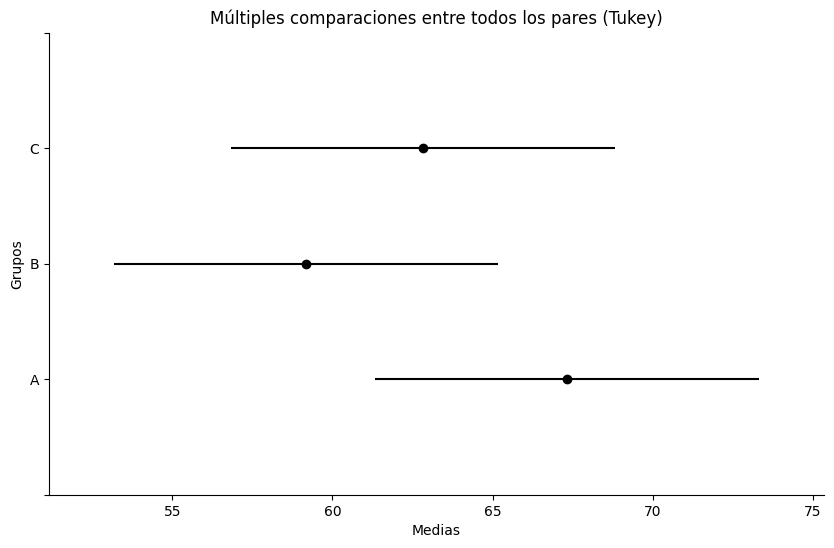

In [5]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.

In [6]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['marca'] == 'A']['valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['marca'] == 'B']['valor'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['marca'] == 'C']['valor'], "Grupo C", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9156
Valor p: 0.4744
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.


In [7]:
#Daniela Montserrat Robledo Ruvalcaba
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['marca'] == 'A']['valor'],
    df[df['marca'] == 'B']['valor'],
    df[df['marca'] == 'C']['valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.02424085880385732
Valor p: 0.9879527271413213
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


## a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  

El factor de tratamiento son los silos, pues es la variable que nos interesa investigar para saber si hay problemas con ellos.

Y el factor de bloque son los dias, ya que, aunque no es la variable que nos interesa principalmente si influye en el factor de tratamiento.

In [8]:
#Daniela Montserrat Robledo Ruvalcaba
import pandas as pd
from io import StringIO

data = '''
silo,temperatura,dia
A,4.0,lunes
A,4.0,martes
A,5.0,miercoles
A,0.5,jueves
A,3.0,viernes
B,5.0,lunes
B,6.0,martes
B,2.0,miercoles
B,4.0,jueves
B,4.0,viernes
C,4.5,lunes
C,4.0,martes
C,3.5,miercoles
C,2.0,jueves
C,3.0,viernes
D,2.5,lunes
D,4.0,martes
D,6.5,miercoles
D,4.5,jueves
D,4.0,viernes
E,4.0,lunes
E,4.0,martes
E,3.5,miercoles
E,2.0,jueves
E,4.0,viernes
'''

df = pd.read_csv(StringIO(data))
df

,silo,temperatura,dia
0,A,4.0,lunes
1,A,4.0,martes
2,A,5.0,miercoles
3,A,0.5,jueves
4,A,3.0,viernes
5,B,5.0,lunes
6,B,6.0,martes
7,B,2.0,miercoles
8,B,4.0,jueves
9,B,4.0,viernes


##b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

Hipotesis: Es probable que algunos de los cinco silos analizados presente fallas en la conservacion de la temperatura.

## c) ¿Hay diferencia entre los silos?

Según ANOVA, no existen diferencias entre los silos

In [9]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'dia'    # La variable que no me interesa comparar
interes = 'silo'      # La variable que me interesa comparar
respuesta = 'temperatura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo= ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los silos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los silos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
          sum_sq    df         F    PR(>F)
C(silo)     4.46   4.0  0.690402  0.609212
C(dia)      9.76   4.0  1.510836  0.246022
Residual   25.84  16.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los silos.
Conclusión: No hay diferencias significativas entre los bloques.


##d) ¿La temperatura de un día a otro es diferente?  

No existe evidencia para decir que la temperatura cambia de un dia a otro

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
   jueves     lunes      1.4 0.4017 -0.9294 3.7294  False
   jueves    martes      1.8 0.1821 -0.5294 4.1294  False
   jueves miercoles      1.5 0.3359 -0.8294 3.8294  False
   jueves   viernes      1.0 0.7032 -1.3294 3.3294  False
    lunes    martes      0.4  0.985 -1.9294 2.7294  False
    lunes miercoles      0.1 0.9999 -2.2294 2.4294  False
    lunes   viernes     -0.4  0.985 -2.7294 1.9294  False
   martes miercoles     -0.3 0.9949 -2.6294 2.0294  False
   martes   viernes     -0.8 0.8397 -3.1294 1.5294  False
miercoles   viernes     -0.5 0.9661 -2.8294 1.8294  False
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

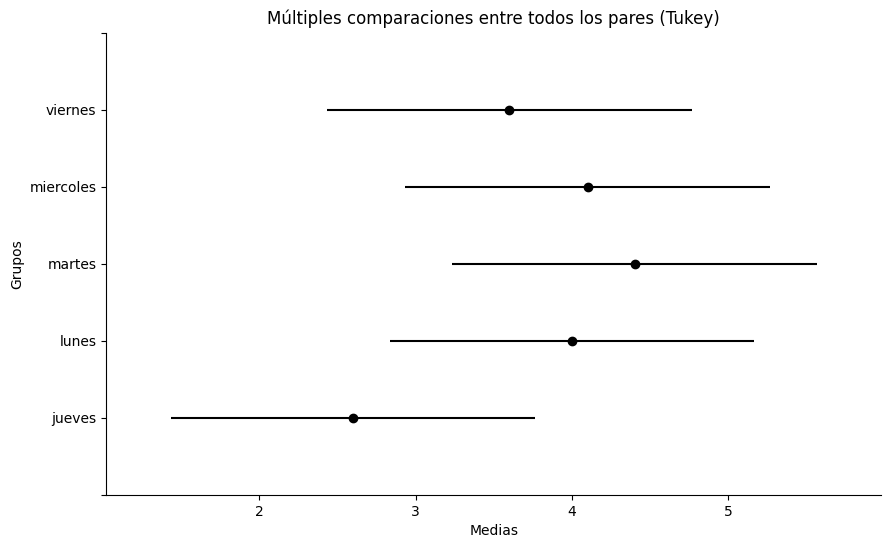

In [10]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura'], groups=df['dia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## e) Revise residuos, ¿hay algún problema evidente?

En la prueba ANOVA la suma de cuadrados da como resultado 25.84, y en la grafica lo que llama la atención es que hay valores no idetificados dispersos, asi que es recomendable analizar el correcto funcionamiento del modelo

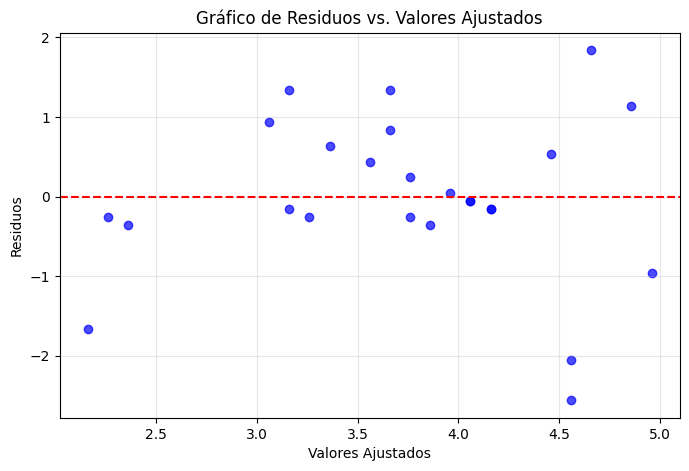

In [11]:
#Daniela Montserrat Robledo Ruvalcaba
modelo = ols("temperatura ~ C(silo) + C(dia)", data=df).fit()

# Obtener valores ajustados y residuos
valores_ajustados = modelo.fittedvalues
residuos = modelo.resid

# Crear gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(valores_ajustados, residuos, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)
plt.show()

## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


## a) ¿Cómo se aleatorizó el experimento?  

Para poder lograr que los datos sean aleatorios se utiliza un diseño de cuadro latino, en el cual cada tipo de catalizador es asignado solamente una vez por lote y una vez por dia.

In [12]:
# Daniela Montserrat Robledo Ruvalcaba
import pandas as pd
from io import StringIO

data = '''
lote,dia,catalizador,tiempo
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3
2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8
3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5
4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10
5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8
'''

df = pd.read_csv(StringIO(data))
df

,lote,dia,catalizador,tiempo
0,1,1,A,8
1,1,2,B,7
2,1,3,D,1
3,1,4,C,7
4,1,5,E,3
5,2,1,C,11
6,2,2,E,2
7,2,3,A,7
8,2,4,D,3
9,2,5,B,8


## b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.

Ecuación:
modelo = respuesta ~ C(interes) + C(bloque_1) + C(bloque_2)

Hipotesis nula: Existe diferencia entre los lotes

Hipotesis alternativa: No existe diferencia entre los lotes

## c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?

Si existen diferencias.

Los catalizadores A y B requieren mas tiempo, los catalizadores D y E requiren de menos tiempo, sin embargo el C esta en el medio

In [13]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'lote'   # Primer bloque (factor no principal)
bloque_2 = 'dia'    # Segundo bloque (factor no principal)
interes = 'catalizador'       # Variable de interés (tratamiento)
respuesta = 'tiempo'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                sum_sq    df          F    PR(>F)
C(catalizador)  141.44   4.0  11.309168  0.000488
C(lote)          15.44   4.0   1.234542  0.347618
C(dia)           12.24   4.0   0.978678  0.455014
Residual         37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: catalizador.
Conclusión: No hay diferencias significativas: lote.
Conclusión: No hay diferencias significativas: dia.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

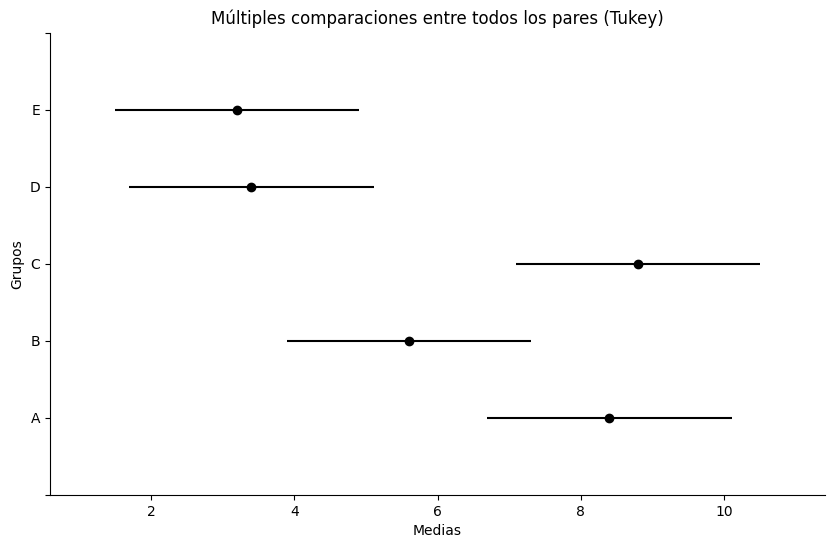

In [14]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  

In [15]:
#Daniela Montserrat Robledo Ruvalcab
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'lote'   # Primer bloque (factor no principal)
bloque_2 = 'dia'      # Segundo bloque (factor no principal)
bloque_3 = 'catalizador'      # Tercer bloque (factor no principal)
interes = 'tiempo'       # Variable de interés (tratamiento)

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")


Resultados del ANOVA para el Cuadro Latino:
                      sum_sq    df             F        PR(>F)
C(tiempo)       3.752000e+01  10.0  3.083865e+26  3.242685e-27
C(lote)         4.212959e-28   4.0  8.656847e-03  9.997104e-01
C(dia)          3.823167e-28   4.0  7.855896e-03  9.997607e-01
C(catalizador)  9.567725e-29   4.0  1.965989e-03  9.999847e-01
Residual        2.433310e-26   2.0           NaN           NaN

Conclusión: Hay diferencias significativas: tiempo.
Conclusión: No hay diferencias significativas: lote.
Conclusión: No hay diferencias significativas: dia.
Conclusión: No hay diferencias significativas: catalizador.


## e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  

Según los graficos de barras realizado los catalizadores D y E son los mejores

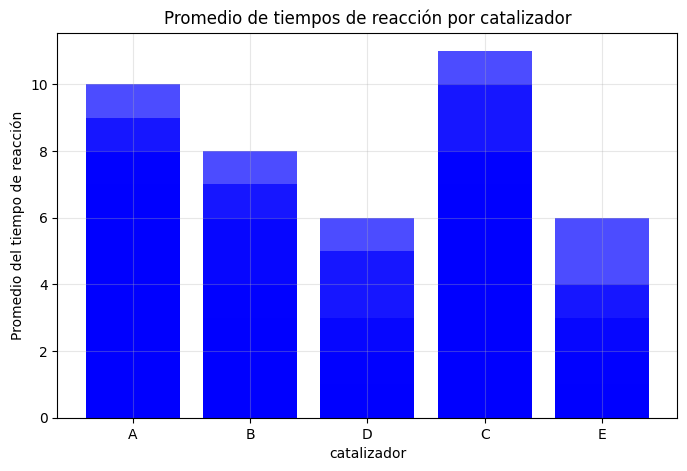

In [16]:
#Daniela Montserrat Robledo Ruvalcaba
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
data= '''
catalizador,tiempo
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df_catalizador = pd.read_csv(StringIO(data))

# Gráfico de medias para los lotes
plt.figure(figsize=(8, 5))
plt.bar(df_catalizador["catalizador"], df_catalizador["tiempo"], color='blue', alpha=0.7)
plt.title("Promedio de tiempos de reacción por catalizador")
plt.xlabel("catalizador")
plt.ylabel("Promedio del tiempo de reacción")
plt.grid(alpha=0.3)
plt.show()


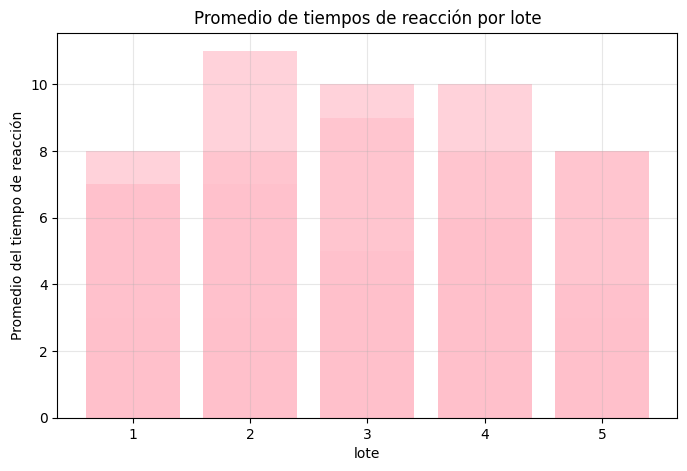

In [17]:
#Daniela Montserrat Robledo Ruvalcaba
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
data= '''
lote,tiempo
1,8
1,7
1,1
1,7
1,3
2,11
2,2
2,7
2,3
2,8
3,4
3,9
3,10
3,1
3,5
4,6
4,8
4,6
4,6
4,10
5,4
5,2
5,3
5,8
5,8
'''

df_lote= pd.read_csv(StringIO(data))

# Gráfico de medias para los lotes
plt.figure(figsize=(8, 5))
plt.bar(df_lote["lote"], df_lote["tiempo"], color='pink', alpha=0.7) # Changed "Tiempo" to "tiempo"
plt.title("Promedio de tiempos de reacción por lote")
plt.xlabel("lote")
plt.ylabel("Promedio del tiempo de reacción")
plt.grid(alpha=0.3)
plt.show()

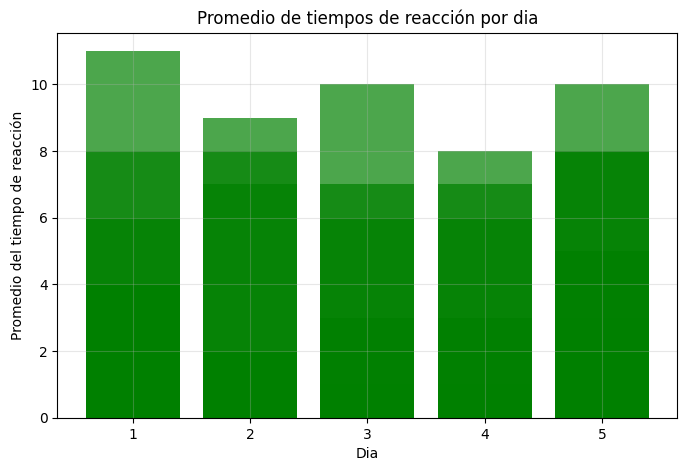

In [18]:
#Daniela Montserrat Robledo Ruvalcab
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
data= '''
dia,tiempo
1,8
2,7
3,1
4,7
5,3
1,11
2,2
3,7
4,3
5,8
1,4
2,9
3,10
4,1
5,5
1,6
2,8
3,6
4,6
5,10
1,4
2,2
3,3
4,8
5,8
'''

df_dia = pd.read_csv(StringIO(data))

# Gráfico de medias para los lotes
plt.figure(figsize=(8, 5))
plt.bar(df_dia["dia"], df_dia["tiempo"], color='green', alpha=0.7) # Changed "Tiempo" to "tiempo"
plt.title("Promedio de tiempos de reacción por dia")
plt.xlabel("Dia")
plt.ylabel("Promedio del tiempo de reacción")
plt.grid(alpha=0.3)
plt.show()

## f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.

In [19]:
#Daniela Montserrat Robledo Ruvalcaba
# Prueba de Shapiro
import pandas as pd
from io import StringIO

data = '''
lote,dia,catalizador,tiempo
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3
2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8
3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5
4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10
5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8
'''

df = pd.read_csv(StringIO(data))

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['lote'] == 1]['tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['lote'] == 2]['tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['lote'] == 3]['tiempo'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['lote'] == 4]['tiempo'], "Grupo D", nivel_de_significancia)
prueba_shapiro(df[df['lote'] == 5]['tiempo'], "Grupo E", nivel_de_significancia)




Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8576
Valor p: 0.2199
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9430
Valor p: 0.6871
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9430
Valor p: 0.6871
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.7709
Valor p: 0.0460
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo E:
Estadístico: 0.8433
Valor p: 0.1741
Interpretación: Los datos tienen una distribución normal.


In [20]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05
#Daniela Montserrat Robledo Ruvalcaba
# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['lote'] == '1']['tiempo'],
    df[df['lote'] == '2']['tiempo'],
    df[df['lote'] == '3']['tiempo'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: nan
Valor p: nan
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [21]:
# Daniela Montserrat Robledo Ruvalcaba
import pandas as pd
from io import StringIO

data = '''
inspector,escala,proveedor,gramos
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13
'''

df = pd.read_csv(StringIO(data))
df

,inspector,escala,proveedor,gramos
0,I,1,A,16
1,I,2,B,10
2,I,3,C,11
3,II,1,B,15
4,II,2,C,9
5,II,3,A,14
6,III,1,C,13
7,III,2,A,11
8,III,3,B,13


## a) ¿Hay diferencias entre los proveedores?  

La prueba ANOVA arrojó que si existen diferencias entre los proveedores

In [22]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'inspector'   # Primer bloque (factor no principal)
bloque_2 = 'escala'    # Segundo bloque (factor no principal)
interes = 'proveedor'       # Variable de interés (tratamiento)
respuesta = 'gramos'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(proveedor)  10.888889  2.0   49.0  0.020000
C(inspector)   0.222222  2.0    1.0  0.500000
C(escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: proveedor.
Conclusión: No hay diferencias significativas: inspector.
Conclusión: Hay diferencias significativas: escala.


##b) ¿Hay diferencias entre los inspectores y entre las escalas?

No existen diferencias significativas.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     I     II      0.0   1.0 -2.5052 2.5052  False
     I    III      0.0   1.0 -2.5052 2.5052  False
    II    III      0.0   1.0 -2.5052 2.5052  False
--------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

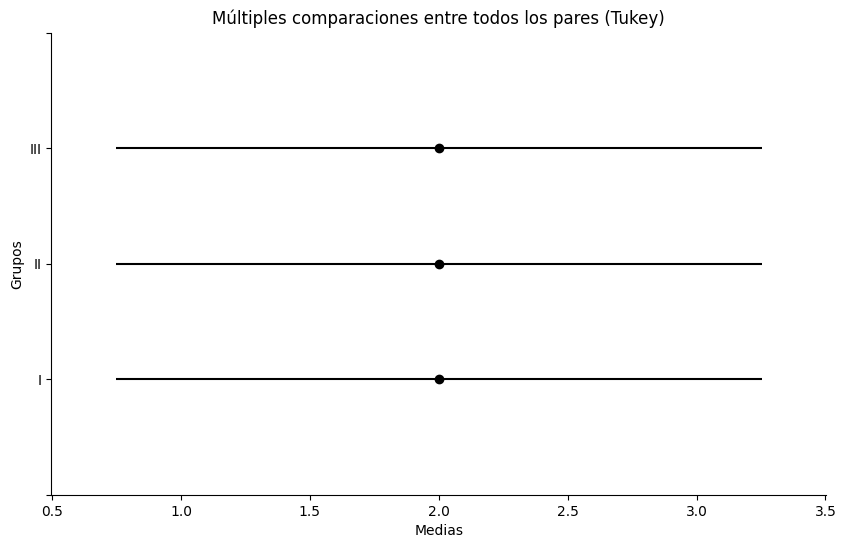

In [23]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['escala'], groups=df['inspector'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  

El proveedor B es el mejor si se busca que el peso sea de 15 gramos

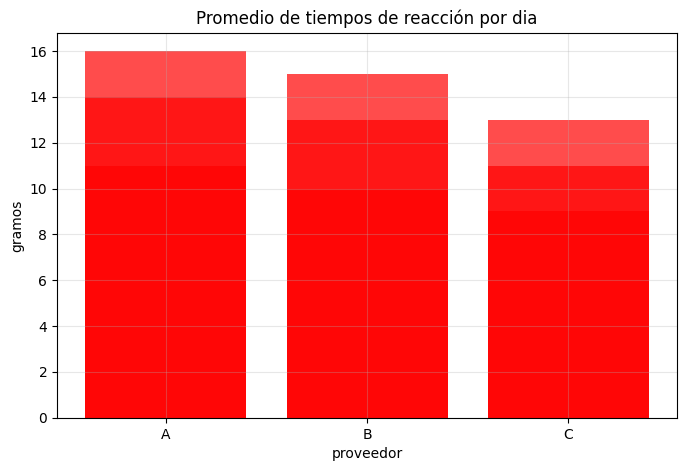

In [24]:
#Daniela Montserrat Robledo Ruvalcab
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
data= '''
proveedor,gramos
A,16
B,10
C,11
B,15
C,9
A,14
C,13
A,11
B,13

'''

df_pro = pd.read_csv(StringIO(data))

# Gráfico de medias para los lotes
plt.figure(figsize=(8, 5))
plt.bar(df_pro["proveedor"], df_pro["gramos"], color='red', alpha=0.7)
plt.title("Promedio de tiempos de reacción por dia")
plt.xlabel("proveedor")
plt.ylabel("gramos")
plt.grid(alpha=0.3)
plt.show()

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [25]:
# Daniela Montserrat Robledo Ruvalcaba
import pandas as pd
from io import StringIO

data = '''
ren,col,variedad,toneladas
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660
'''

df = pd.read_csv(StringIO(data))
df

,ren,col,variedad,toneladas
0,1,1,B,1.640
1,1,2,D,1.210
2,1,3,C,1.425
3,1,4,A,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


##a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maiz.

Si existen diferencias significativas entre las variedades de maiz.

In [26]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'ren'   # Primer bloque (factor no principal)
bloque_2 = 'col'    # Segundo bloque (factor no principal)
interes = 'variedad'       # Variable de interés (tratamiento)
respuesta = 'toneladas'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
               sum_sq   df          F    PR(>F)
C(variedad)  0.426842  3.0   6.587865  0.025092
C(ren)       0.030155  3.0   0.465406  0.716972
C(col)       0.827342  3.0  12.769166  0.005148
Residual     0.129584  6.0        NaN       NaN

Conclusión: Hay diferencias significativas: variedad.
Conclusión: No hay diferencias significativas: ren.
Conclusión: Hay diferencias significativas: col.


##b) ¿Cuál de los factores de bloque tuvo efectos?

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.0075    1.0 -0.5946 0.6096  False
     A      C  -0.3962 0.2578 -0.9983 0.2058  False
     A      D   -0.125 0.9249 -0.7271 0.4771  False
     B      C  -0.4037 0.2444 -1.0058 0.1983  False
     B      D  -0.1325 0.9124 -0.7346 0.4696  False
     C      D   0.2712 0.5583 -0.3308 0.8733  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

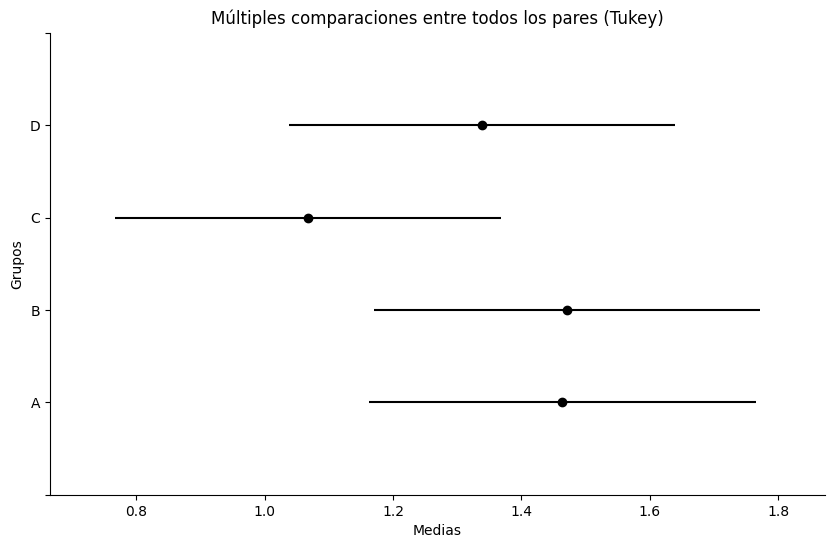

In [27]:
#Daniela Montserrat Robledo Ruvalcaba
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['toneladas'], groups=df['variedad'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

##c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  

No, las mismas diferencias probablemente no se detectarían con un diseño completamente al azar, ya que no controlar los efectos significativos de las columnas podría esconder las diferencias entre las variedades.


##d) ¿Y con un diseño en bloques completos al azar?  

Con un diseño en bloques completos al azar usando el gradiente de fertilidad como bloque si se podrian detectar las mismas diferencias entre las variedades, ya que se controlaria el efecto significativo de las columnas.